理论提升时间为 [1.6363636363636362, 1.9652173913043474, 2.1516666666666664, 2.24592, 2.280907692307692, 2.2782414814814813, 2.252098714285714, 2.211763268965517, 2.1632931453333333, 2.11061793716129, 2.0562627886374996, 2.0018268625903026, 1.9483000154657644, 1.8962725819452906, 1.8460743960461004]


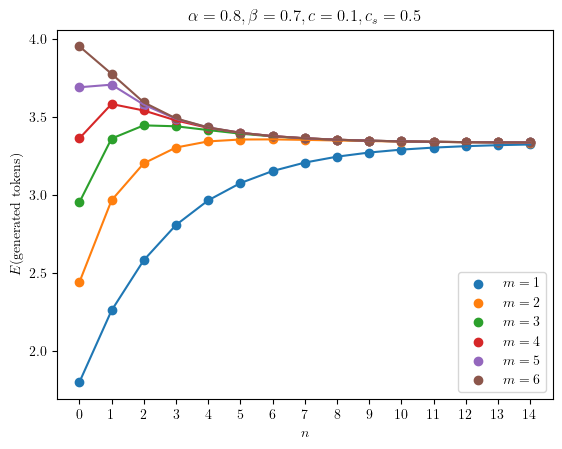

In [42]:
#Speculative Decoding中的层级结构
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#   启用LaTeX渲染   例  r'$M_p$ encoder'
plt.rcParams['text.usetex'] = True

#   超参数设定
c = 0.1
c_s = 0.5
alpha = 0.8
beta = 0.7

#   返回平均生成的tokens数量
def hierarchy(n, m, tokens, times):
    '''
    :type n: list
    '''
    for i in n:
        Q = alpha * (beta ** i)
        tokens[i] = (1 - beta ** (i + 1)) * (1 - Q ** m) / ((1 - beta) * (1 - Q)) + Q ** m
        times[i] = tokens[i] / (1 + m * c + m * i * c * c_s)

n = list(range(15))
tokens = [0]*len(n)
times = [0]*len(n)

labels = [r'$m=1$',r'$m=2$',r'$m=3$',r'$m=4$',r'$m=5$',r'$m=6$']

for m in range(1,7):
    hierarchy(n, m, tokens, times)
    plt.scatter(n, tokens, label = labels[m-1])
    plt.plot(n, tokens)
    if m == 1:
        print("理论提升时间为", times)

#   Improve_hierarchy = Expected_generatedtokens_hierarchy / (1 + m * c + m * n * c * c_s)

#   print("理论提升效率为: ", Improve_hierarchy)

#   plt.scatter(n, Improve_hierarchy, label = "m=1")

#   设置图片坐标轴标签和标题
plt.title(r"$\alpha = 0.8, \beta = 0.7, c=0.1, c_s=0.5$")
plt.xlabel(r'$n$')

plt.ylabel(r'$E(\mathrm{generated\ tokens})$')

#plt.ylabel(r'$E(\mathrm{time\ improvement})$')

plt.legend()

#   设置x轴刻度间隔
plt.xticks(n)

# 保存图片，设置分辨率为300dpi

#plt.savefig('time-improvement-3.png', dpi=200)

plt.savefig('token-generated-3.png', dpi=200)

plt.show()

[19.2, 17.92, 17.9, 16.62, 16.6, 15.32, 15.3, 14.02, 14.0, 12.72, 12.7, 11.42, 11.4, 10.12, 10.1, 8.82, 8.8, 7.52, 7.5, 6.22, 6.2, 4.92, 4.9, 3.62, 3.6, 2.32, 2.3, 1.02, 1]


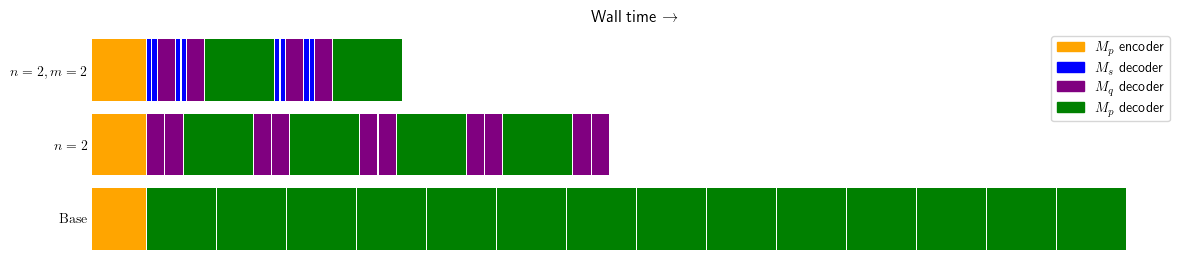

In [37]:
#   Hierarchical Speculative Decoding叠加条形图

import matplotlib.pyplot as plt
import numpy as np
#   浮点数相加可能出问题
from decimal import Decimal

#   启用LaTeX渲染   例  r'$M_p$ encoder'
plt.rcParams['text.usetex'] = True

#   条形长度
base = 1
p = 1.28
q = 0.32
s = 0.08
gap = 0.02

data_2 = [base]
colors_2 = ['orange']
for k in range(2):
    for m in range(2):
        for n in range(2):
            data_2.insert(0, float(Decimal(str(data_2[0])) + Decimal(str(gap))))
            data_2.insert(0, float(Decimal(str(data_2[0])) + Decimal(str(s))))
            colors_2.insert(0, 'white')
            colors_2.insert(0, 'blue')
        data_2.insert(0, float(Decimal(str(data_2[0])) + Decimal(str(gap))))
        data_2.insert(0, float(Decimal(str(data_2[0])) + Decimal(str(q))))
        colors_2.insert(0, 'white')
        colors_2.insert(0, 'purple')
    data_2.insert(0, float(Decimal(str(data_2[0])) + Decimal(str(gap))))
    data_2.insert(0, float(Decimal(str(data_2[0])) + Decimal(str(p))))
    colors_2.insert(0, 'white')
    colors_2.insert(0, 'green')

data_1 = [base]
colors_1 = ['orange']
for k in range(14):
    data_1.insert(0, float(Decimal(str(data_1[0])) + Decimal(str(gap))))
    data_1.insert(0, float(Decimal(str(data_1[0])) + Decimal(str(p))))
    colors_1.insert(0, 'white')
    colors_1.insert(0, 'green')
print(data_1)

data_3 = [base]
colors_3 = ['orange']
for k in range(5):
    for n in range(2):
        data_3.insert(0, float(Decimal(str(data_3[0])) + Decimal(str(gap))))
        data_3.insert(0, float(Decimal(str(data_3[0])) + Decimal(str(q))))
        colors_3.insert(0, 'white')
        colors_3.insert(0, 'purple')
    if k < 4:
        data_3.insert(0, float(Decimal(str(data_3[0])) + Decimal(str(gap))))
        data_3.insert(0, float(Decimal(str(data_3[0])) + Decimal(str(p))))
        colors_3.insert(0, 'white')
        colors_3.insert(0, 'green')

row_labels = [r'$\mathrm{Base}$', r'$n=2$', r'$n=2, m=2$']

colors = ['green','white','purple','white','blue', 'white', 'blue', 'white', 'blue','white','purple','white','blue', 'white', 'blue', 'white', 'blue', 'orange']

colors_labels = ['orange','blue','purple','green']
column_labels = [r'$M_p$ encoder', r'$M_s$ decoder', r'$M_q$ decoder', r'$M_p$ decoder']

# 设置图形的大小
fig, ax = plt.subplots(figsize=(14, 3))

# Plotting each row
ax.barh(1, data_1, color = colors_1, height = 0.5)
ax.barh(1.6, data_3, color = colors_3, height = 0.5)
ax.barh(2.2, data_2, color = colors_2, height = 0.5)

# 隐藏x轴的刻度和标签
plt.xticks([])

# 设置y轴的刻度和标签   竖直记号    rotation = 'vertical'
plt.yticks([1, 1.6, 2.2], row_labels)

# 添加图例
patches = [plt.Rectangle((0,0),1,1, color=clr) for clr in colors_labels]
plt.legend(patches, column_labels, loc='upper right')
ax.set_title('Wall time →')

#去掉标签Base右侧区域的小横线
plt.tick_params(axis='both', which='both', length=0)

# 隐藏所有的坐标轴线
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# 保存图片，设置分辨率为300dpi
plt.savefig('work-flow-2.png', dpi=200)

plt.show()